In [2]:
import cirq
import sympy
from scipy.optimize import *
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Cost Matrices

In [3]:
def create_cost_matrix(n_towns):
   """Рандомная матрица с положительными элементами, 
   которая хранит длины рёбер между каждой парой городов"""

   A = np.random.random((n_towns, n_towns))
   
   for i in range(n_towns):
     A[i][i] = np.nan

   return A

In [4]:
def cost_of_permutation(cost_matrix, town_sequence):
  cost = 0.0

  for i in range(len(town_sequence)-1):
    cost += cost_matrix [town_sequence[i]] [town_sequence[i+1]]
  
  return cost

In [5]:
cost_matrix_4 = np.array([[np.nan    , 0.35271991, 0.96262685, 0.11727604],
                          [0.13505078, np.nan    , 0.63915344, 0.43149425],
                          [0.58432224, 0.83676812, np.nan    , 0.4879146 ],
                          [0.14998587, 0.45394107, 0.2140258 , np.nan    ]])

In [6]:
cost_matrix_4_2 = np.array([[    np.nan, 0.81622592, 0.20408823, 0.09008185],
                            [0.76482761,     np.nan, 0.14736744, 0.3630235 ],
                            [0.61341101, 0.77179601,     np.nan, 0.95344378],
                            [0.55374766, 0.6944981 , 0.16269875,     np.nan]])

In [7]:
cost_matrix_5 = np.array([[    np.nan, 0.76227914, 0.2634839 , 0.20971233, 0.42631259],
                          [0.44639413,     np.nan, 0.55598626, 0.92765347, 0.31959185],
                          [0.79979159, 0.73929719,     np.nan, 0.92673736, 0.14842685],
                          [0.43804313, 0.20916616, 0.2693464 ,     np.nan, 0.91146279],
                          [0.06022013, 0.70339376, 0.51852765, 0.77323457,     np.nan]])

In [8]:
cost_matrix_6 = \
np.array([[    np.nan, 0.00165482, 0.72520661, 0.4163876 , 0.03288493, 0.54206491],
          [0.74621655,     np.nan, 0.37808992, 0.95303594, 0.17005047, 0.61706156],
          [0.01730168, 0.42465019,     np.nan, 0.34035056, 0.9397413 , 0.06493504],
          [0.2761505 , 0.66518233, 0.42480788,     np.nan, 0.11856712, 0.34309329],
          [0.82796128, 0.86227791, 0.29369849, 0.0604712 ,     np.nan, 0.54814749],
          [0.56525883, 0.63791584, 0.29638851, 0.85863453, 0.75516877,     np.nan]])

In [9]:
cost_matrix_7 = np.array([
       [        np.nan, 7.79483870e-01, 2.46516516e-01, 4.14276710e-01,
        8.89571789e-01, 7.57889375e-01, 7.95729409e-01],
       [3.49235590e-02,         np.nan, 9.20405902e-01, 8.17663877e-01,
        8.03191682e-01, 5.47471940e-01, 6.82288641e-01],
       [1.55196154e-01, 7.01254285e-01,         np.nan, 3.41477772e-01,
        8.49076627e-01, 8.99204839e-01, 2.16138721e-01],
       [2.71884960e-02, 1.77042183e-01, 8.22268694e-02,         np.nan,
        2.71236904e-01, 7.49329588e-01, 5.80932252e-01],
       [6.52178051e-01, 3.04637898e-04, 7.40780993e-01, 5.46777448e-01,
                np.nan, 3.05782054e-01, 3.73227063e-01],
       [9.43146606e-01, 7.28633819e-01, 2.59561490e-01, 6.52658317e-01,
        4.36989411e-01,         np.nan, 7.15042723e-01],
       [6.49969984e-01, 2.00003228e-01, 7.31186114e-01, 8.09980875e-01,
        8.76425288e-01, 2.36328971e-01,         np.nan]])

In [10]:
cost_matrix_8 = np.array([
    [    np.nan, 0.83911204, 0.7035106 , 0.39668363, 0.46117354, 0.19510413, 0.48658963, 0.46131103],
    [0.5870892 ,     np.nan, 0.54862795, 0.74507107, 0.49289714, 0.47200892, 0.57741251, 0.62507757],
    [0.46634288, 0.91587751,     np.nan, 0.35612168, 0.42860855, 0.12815892, 0.89677141, 0.85594071],
    [0.53797555, 0.4979348 , 0.97516805,     np.nan, 0.01425964, 0.21532494, 0.3322861 , 0.0289443 ],
    [0.22634373, 0.62941811, 0.33450535, 0.86398671,     np.nan, 0.50767408, 0.72648152, 0.99268613],
    [0.41810008, 0.98537316, 0.81336165, 0.06436564, 0.58484745,     np.nan, 0.12191475, 0.81467971],
    [0.94842273, 0.44981522, 0.93452495, 0.89825261, 0.36265244, 0.36477084,     np.nan, 0.26013962],
    [0.01901475, 0.50642185, 0.91862145, 0.26389184, 0.29948766, 0.01025452, 0.32753958,     np.nan]])

In [11]:
cost_matrix_8_2 = np.array([
       [    np.nan, 0.64872847, 0.88020467, 0.78913892, 0.46785642, 0.69541255, 0.23191492, 0.85322733],
       [0.46917114,     np.nan, 0.42555454, 0.52606282, 0.19376313, 0.48851406, 0.30183166, 0.02283085],
       [0.1449283 , 0.74410943,     np.nan, 0.21722092, 0.92483096, 0.01475718, 0.08342113, 0.13317224],
       [0.08553635, 0.56252109, 0.91751235,     np.nan, 0.82967563, 0.41104149, 0.02612125, 0.10715602],
       [0.94803921, 0.04565049, 0.51695437, 0.00566878,     np.nan, 0.42112318, 0.24739168, 0.85457518],
       [0.77870455, 0.82198046, 0.7048397 , 0.29999013, 0.6317126 ,     np.nan, 0.35259626, 0.6471396 ],
       [0.51487495, 0.83665139, 0.18311281, 0.90557789, 0.18106142, 0.76075651,     np.nan, 0.54475754],
       [0.63170062, 0.12843803, 0.79344824, 0.62246307, 0.36102696, 0.83841104, 0.75254801,     np.nan]])

In [12]:
cost_matrix_9 = np.array([
       [    np.nan, 0.67730004, 0.41469005, 0.79472044, 0.18201466,
        0.46028408, 0.80285353, 0.72205716, 0.71496473],
       [0.39370189,     np.nan, 0.92559661, 0.82061891, 0.39502622,
        0.09982358, 0.48799828, 0.47965996, 0.62942811],
       [0.54912218, 0.29675661,     np.nan, 0.10840787, 0.06461134,
        0.18617408, 0.93330297, 0.96050468, 0.15551516],
       [0.57658941, 0.66653557, 0.72491664,     np.nan, 0.87755139,
        0.8373838 , 0.55504568, 0.91359404, 0.46189636],
       [0.20427693, 0.11267771, 0.99134019, 0.26771698,     np.nan,
        0.83409189, 0.04453648, 0.21849577, 0.84957441],
       [0.96956966, 0.39490577, 0.5168001 , 0.56924986, 0.01914814,
            np.nan, 0.05866781, 0.92840136, 0.84975596],
       [0.8386292 , 0.96833296, 0.84341776, 0.48349312, 0.74474585,
        0.32327426,     np.nan, 0.9752778 , 0.29314212],
       [0.96141681, 0.19493041, 0.81237712, 0.22167303, 0.38524551,
        0.3649113 , 0.66851447,     np.nan, 0.82661027],
       [0.13551012, 0.91175874, 0.18618829, 0.09654281, 0.57258329,
        0.27462785, 0.23385379, 0.594836  ,     np.nan]])

In [13]:
cost_matrix_10 = np.array([
    [       np.nan, 0.07942641, 0.99031838, 0.09895247, 0.72745531,
        0.81045902, 0.15923533, 0.61330537, 0.90258873, 0.15491793],
       [0.88407753,     np.nan, 0.06199901, 0.56877632, 0.70008972,
        0.81340743, 0.84484164, 0.92044895, 0.59612563, 0.45129374],
       [0.50613502, 0.10989179,     np.nan, 0.73065915, 0.85902533,
        0.27992034, 0.22580289, 0.40041954, 0.66807122, 0.89457109],
       [0.80156922, 0.67934361, 0.44204649,     np.nan, 0.16947546,
        0.29116308, 0.84592144, 0.96306772, 0.98000683, 0.67636839],
       [0.6794687 , 0.15517822, 0.70378366, 0.06865874,     np.nan,
        0.41927295, 0.3731578 , 0.69591233, 0.64424128, 0.04614225],
       [0.05896441, 0.85363734, 0.40025621, 0.13863461, 0.29386601,
            np.nan, 0.60606968, 0.40311522, 0.32417107, 0.3095105 ],
       [0.26764498, 0.99628721, 0.76874766, 0.44323412, 0.34564126,
        0.46406834,     np.nan, 0.18756799, 0.11153533, 0.27771632],
       [0.85918156, 0.4737215 , 0.47637782, 0.47882724, 0.45202033,
        0.40306174, 0.69005201,     np.nan, 0.09939983, 0.05238272],
       [0.4481055 , 0.89202079, 0.18795216, 0.47662974, 0.5363038 ,
        0.00846634, 0.98229673, 0.57620242,     np.nan, 0.80506734],
       [0.38888649, 0.25867673, 0.69360475, 0.56495989, 0.39199138,
        0.27841065, 0.12511922, 0.95978543, 0.44909675,     np.nan]])

### Аналитическое решение

Переберём все перестановки в лексикографическом порядке.

Будем итерироваться по номеру перестановки. Сначала переведём его в факториальную систему счисления [(factoradic)](https://en.wikipedia.org/wiki/Factorial_number_system). Полученные цифры будут совпадать с [кодом Лемера](https://en.wikipedia.org/wiki/Lehmer_code) перестановки. 

Затем по коду Лемера вычислим саму перестановку и затем её стоимость.

In [14]:
# Могут понадобиться факториалы, поэтому на всякий случай вычислим их заранее
#
# factorials[n] == n!

factorials = [1]
for i in range(30):
  # Предполагаю, что n_towns < 30
  factorials.append(factorials[i] * (i+1))

In [15]:
def factoradic_from_perm_number(perm_number : int, factoradic_array):
  """Преобразует число в факториальную систему счисления.
  Записывает полученные цифры в factoradic_array.
  Нулевая цифра в массиве - самая значимая. Последняя цифра всегда равна 0.
  Алгоритм из https://en.wikipedia.org/wiki/Factorial_number_system#Definition """

  N = perm_number
  n_towns = len(factoradic_array)
  assert N < factorials[n_towns]

  for i in range(1, len(factoradic_array) + 1):
    N, factoradic_array[-i] = divmod(N, i)
  
  return factoradic_array

In [16]:
def permutation_from_factoradic(nums : np.ndarray):
  """Перезаписывает массив nums.
  Если изначально там находилось число в факториальной системе, то потом там будет находиться перестановка.
  Города в полученной перестановке нумеруются с 0. 
  Алгоритм из https://en.wikipedia.org/wiki/Lehmer_code#Encoding_and_decoding """
  for i in range(len(nums)-2, -1, -1):
    for j in range(i+1, len(nums)):
      if(nums[j] >= nums[i]):
        nums[j] += 1
  return nums

In [17]:
def brute(cost_matrix):
  """Перебирает все возможные перестановки и запоминает их кост."""

  n_towns = len(cost_matrix)

  factoradic_array = np.ndarray(n_towns, int)

  answers_array = []

  min_cost = np.inf
  opt_perm_number = np.nan

  for perm_number in range(factorials[n_towns]):
    town_sequence = permutation_from_factoradic(
                        factoradic_from_perm_number(perm_number, factoradic_array)
                    )
    cost = cost_of_permutation(
        cost_matrix,
        town_sequence
        )

    answers_array.append(cost)

    if cost < min_cost:
      min_cost = cost
      opt_perm_number = perm_number

  answers_df = pd.DataFrame(answers_array, columns = ["cost"])
  mean = answers_df['cost'].mean()
  answers_df['cost / mean'] = answers_df['cost'] / mean

  return {"opt_perm_number": opt_perm_number,
                 "min_cost": min_cost,
                     "mean": mean,
                      "all": answers_df}

### Алгоритм Rotosolve

In [18]:
def rotosolve(f, x0, tol = 1e-3, max_ncycles = 150, verbose = False, abs = False):
    """Находит минимум функции f с помощью алгоритма Rotosolve.

    Args:

        x0  - начальная точка, можно взять рандомную

        tol - итерации прекращаются, если улучшение за один цикл обновления вектора X составило меньше tol

        abs - если True, то с величиной tol сравнивается не улучшение f, а его модуль

        max_iter - максимальное число циклов обновления вектора x

        verbose - если True, то сохранять историю значений f

    Returns:

        x, fun - точка минимума и его значение

        ncycles - число циклов обновления вектора x

        nfev - число вычислений функции, оно равно 3 * len(x0) * num_iterations

        cost_history - Python array
    """

    position = x0
    nfev = 0
    ncycles = 0
    previous_cost = np.nan
    current_cost = f(x0)
    shifts_history = []

    if verbose:
        cost_history = [current_cost]
    else:
        cost_history = []

    while ncycles < max_ncycles:
        if abs:
            if np.abs(previous_cost - current_cost) < tol:
                break
        else:
            if previous_cost - current_cost < tol:
                break
        
        previous_cost = current_cost
        for i, theta in enumerate(position):

            position[i] = theta + np.pi / 2
            cost_p = f(position)

            position[i] = theta - np.pi / 2
            cost_m = f(position)

            atan = np.arctan2(2 * current_cost - cost_p - cost_m,
                              cost_p - cost_m)
            position[i] = theta - np.pi / 2 - atan

            current_cost = f(position)
            if verbose:
                cost_history.append(current_cost)
                shifts_history.append(- np.pi / 2 - atan)

            nfev += 3
        ncycles += 1

    return {'fun': current_cost,
       'position': position,
        'ncycles': ncycles,
           'nfev': nfev,
   'cost_history': cost_history,
 'shifts_history': shifts_history}


In [19]:
cost_matrix_10

array([[       nan, 0.07942641, 0.99031838, 0.09895247, 0.72745531,
        0.81045902, 0.15923533, 0.61330537, 0.90258873, 0.15491793],
       [0.88407753,        nan, 0.06199901, 0.56877632, 0.70008972,
        0.81340743, 0.84484164, 0.92044895, 0.59612563, 0.45129374],
       [0.50613502, 0.10989179,        nan, 0.73065915, 0.85902533,
        0.27992034, 0.22580289, 0.40041954, 0.66807122, 0.89457109],
       [0.80156922, 0.67934361, 0.44204649,        nan, 0.16947546,
        0.29116308, 0.84592144, 0.96306772, 0.98000683, 0.67636839],
       [0.6794687 , 0.15517822, 0.70378366, 0.06865874,        nan,
        0.41927295, 0.3731578 , 0.69591233, 0.64424128, 0.04614225],
       [0.05896441, 0.85363734, 0.40025621, 0.13863461, 0.29386601,
               nan, 0.60606968, 0.40311522, 0.32417107, 0.3095105 ],
       [0.26764498, 0.99628721, 0.76874766, 0.44323412, 0.34564126,
        0.46406834,        nan, 0.18756799, 0.11153533, 0.27771632],
       [0.85918156, 0.4737215 , 0.4763778

In [20]:
def rotosolve_x(f, x0, tol = 1e-2, max_ncycles = 150, verbose = False):
    """Аналогично rotosolve, но в качестве критерия остановки служит 
    max |Δx| < tol, 
    где максимум берётся по одному циклу обновления параметров
    """

    position = x0
    nfev = 0
    ncycles = 0
    max_shift_in_cycle = np.nan
    current_cost = f(x0)
    shifts_history = []

    if verbose:
        cost_history = [current_cost]
    else:
        cost_history = []

    while ncycles < max_ncycles and not max_shift_in_cycle < tol:
        
        max_shift_in_cycle = np.nan
        for i, theta in enumerate(position):

            position[i] = theta + np.pi / 2
            cost_p = f(position)

            position[i] = theta - np.pi / 2
            cost_m = f(position)

            atan = np.arctan2(2 * current_cost - cost_p - cost_m,
                              cost_p - cost_m)
            shift = - np.pi / 2 - atan
            position[i] = theta + shift

            if not abs(shift) % (2*np.pi) < max_shift_in_cycle:
                max_shift_in_cycle = abs(shift) % (2*np.pi)

            current_cost = f(position)
            if verbose:
                cost_history.append(current_cost)
                shifts_history.append(shift)

            nfev += 3
        ncycles += 1

    return {'fun': current_cost,
       'position': position,
        'ncycles': ncycles,
           'nfev': nfev,
   'cost_history': cost_history,
 'shifts_history': shifts_history}


### Базовая схема (только Rx)

In [21]:
class RxCircuit:

   def __init__(self, n_towns):
      n_qubits = int(np.ceil(np.log2(factorials[n_towns])))

      self.qubits = cirq.LineQubit.range(n_qubits)
      self.circuit = cirq.Circuit()
      self.simulator = cirq.Simulator()

      self._town_sequence = np.ndarray(n_towns, int)
      self.n_towns = n_towns

      self._angle_names = [f'a_{i}' for i in range(n_qubits)]
      angle_symbols = sympy.symbols(self._angle_names)
      self._grad = np.ndarray(len(angle_symbols))
      self._hess = np.ndarray((len(angle_symbols), len(angle_symbols)))

    # Параметрические гейты
      rx_gates = [cirq.rx(angle)(qubit)
                  for (angle, qubit)
                  in zip(angle_symbols, self.qubits)]

      self.circuit.append(rx_gates)
      
      measurements = cirq.measure_each(*self.qubits)
      self.circuit.append(cirq.Moment(measurements))


   def measure(self, angles, n_samples = 1):

      params = cirq.ParamResolver({
         name: value for (name, value) in
         zip(self._angle_names, angles)
      })

      return self.simulator.run(self.circuit, params, n_samples)


   def cost_of_bits(self, bits, cost_matrix):
      "Вычисляет по последовательности битов перестановку и её стоимость"
      return cost_of_permutation(
          cost_matrix,
          permutation_from_factoradic(
              factoradic_from_perm_number(
                  cirq.big_endian_bits_to_int(bits) % factorials[self.n_towns],
                  self._town_sequence
              )
          )
      )


   def costs(self, angles, cost_matrix, n_samples):
      "Повторяет измерения и каждый раз вычисляет кост"

      measurementDataFrame = self.measure(angles, n_samples).data

      return measurementDataFrame.apply(
          self.cost_of_bits, 
          axis = 1, raw = True, args = (cost_matrix,)
          )
   
   def cost_derivative(self, angles, cost_matrix, n_samples = 100):
      "Сэмплирует и вычисляет производную в соответствии с Parameter Shift Rule"

      for i, theta in enumerate(angles):

         angles[i] = theta + np.pi / 2
         cost_plus = self.costs(angles, cost_matrix, n_samples).mean()

         angles[i] = theta - np.pi / 2
         cost_minus = self.costs(angles, cost_matrix, n_samples).mean()

         self._grad[i] = (cost_plus - cost_minus) / 2
         angles[i] = theta
      
      return self._grad

   def cost_hess(self, angles, cost_matrix, n_samples = 100):
      for i, theta_i in enumerate(angles):
         for j, theta_j in enumerate(angles[:i+1]):
            angles[i] = theta_i + np.pi / 2
            angles[j] = theta_j + np.pi / 2
            cpp = self.costs(angles, cost_matrix, n_samples).mean()

            angles[j] = theta_j - np.pi / 2
            cpm = self.costs(angles, cost_matrix, n_samples).mean()

            angles[i] = theta_i - np.pi / 2
            cmm = self.costs(angles, cost_matrix, n_samples).mean()

            angles[j] = theta_j + np.pi / 2
            cmp = self.costs(angles, cost_matrix, n_samples).mean()

            self._hess[i][j] = self._hess[j][i] = (cpp - cpm - cmp + cmm) / 4

            angles[i] = theta_i
            angles[j] = theta_j
            
      return self._hess


   def optimize(self, cost_matrix, 
               optimizer = rotosolve,
               n_samples = 100,
               **optimizer_kwargs):
      """
      Вызывает функцию, заданную в аргументе optimizer.
      """

      cost_lambda = lambda angles : self.costs(angles, cost_matrix, n_samples).mean()
      jac_lambda  = lambda angles : self.cost_derivative(angles, cost_matrix, n_samples)
      hess_lambda = lambda angles : self.cost_hess(angles, cost_matrix, n_samples)
      

      if 'jac' in optimizer.__code__.co_varnames:
         optimizer_kwargs['jac'] = jac_lambda

      if 'hess' in optimizer.__code__.co_varnames:
         optimizer_kwargs['hess'] = hess_lambda

      if 'x0' in optimizer.__code__.co_varnames:
         if 'x0' not in optimizer_kwargs:
            optimizer_kwargs['x0'] = [2 * np.pi * (np.random.random() - 0.5)
                                                for _ in self._angle_names]

      if 'bounds' in optimizer.__code__.co_varnames:
         if 'bounds' not in optimizer_kwargs:
            if optimizer == shgo:
               optimizer_kwargs['bounds'] = [(None, None) for _ in self._angle_names]
            else:
               optimizer_kwargs['bounds'] = [(-np.pi, np.pi) for _ in self._angle_names]

      return optimizer(cost_lambda, **optimizer_kwargs)


   def __str__(self):
      return self.circuit.__str__()

   def _repr_pretty_(self, *args):
      "Text output in Jupyter"
      return self.circuit._repr_pretty_(*args)

### Схема RxCNOT

In [22]:
class RxCNOTCircuit(RxCircuit):
   def __init__(self, n_towns, n_layer_pairs):
      n_qubits = int(np.ceil(np.log2(factorials[n_towns])))

      self.qubits = cirq.LineQubit.range(n_qubits)
      self.circuit = cirq.Circuit()
      self.simulator = cirq.Simulator()

      self._town_sequence = np.ndarray(n_towns, int)
      self.n_towns = n_towns

      self._angle_names = [f'a_{i}' for i in range(n_layer_pairs * n_qubits)]
      angle_symbols = sympy.symbols(self._angle_names)
      self._grad = np.ndarray(len(angle_symbols))
      self._hess = np.ndarray((len(angle_symbols), len(angle_symbols)))

      # Параметрические гейты
      for layer_pair in range(n_layer_pairs):
          rx_gates = [cirq.rx(angle)(qubit)
                      for (angle, qubit)
                      in zip(
                        angle_symbols[layer_pair*n_qubits : (layer_pair+1)*n_qubits],
                        self.qubits) 
                    ]
          self.circuit.append(cirq.Moment(rx_gates))

          cnot_gates = [cirq.CNOT(q1, q2)
                        for (q1, q2)
                        in zip(self.qubits, self.qubits[1:]) ]
          self.circuit.append(cnot_gates[0::2])
          self.circuit.append(cnot_gates[1::2])

      # Измерения
      measurements = cirq.measure_each(*self.qubits)
      self.circuit.append(cirq.Moment(measurements))

In [23]:
RxCNOTCircuit(4, 2)

0: ───Rx(a_0)───@───────Rx(a_5)───@───────M───
                │                 │
1: ───Rx(a_1)───X───@───Rx(a_6)───X───@───M───
                    │                 │
2: ───Rx(a_2)───@───X───Rx(a_7)───@───X───M───
                │                 │
3: ───Rx(a_3)───X───@───Rx(a_8)───X───@───M───
                    │                 │
4: ───Rx(a_4)───────X───Rx(a_9)───────X───M───

### Функция тестирования

In [24]:
def extensively_test_circuit(cost_matrix, circuit, optimizer = rotosolve, iterations = 100, n_samples = 100, **optimizer_kwargs):
  res = []

  for _ in range(iterations):
    res_n = circuit.optimize(cost_matrix, optimizer, n_samples, **optimizer_kwargs)
    res.append((res_n['fun'], res_n['nfev'], res_n.get('ncycles'), res_n.get('njev'), res_n.get('nhev')))

  return pd.DataFrame(res, columns = ["cost", "nfev", "ncycles", "njev", "nhev"]).fillna(0)

In [25]:
def calculate_statistics(testing_results, n_towns, brute_results):
    testing_results['cost / mean'] = testing_results['cost'] / brute_results['mean']
    costs = brute_results['all']['cost'].sort_values(ignore_index = True)
    rank = costs.searchsorted(testing_results['cost'])
    rank += np.isclose(testing_results['cost'], costs[rank]) # иначе иногда получается rank = 0
    testing_results['percentile_rank'] = rank / factorials[n_towns]
    testing_results['nfev * pr'] = testing_results['nfev'] * testing_results['percentile_rank']
    return testing_results

In [26]:
plt.style.use("default")
sns.set_theme()
sns.set_palette('colorblind')

### Density Plot для 4 городов

In [27]:
brute4 = brute(cost_matrix_4)
brute4['opt_perm_number'], brute4['min_cost']

(7, 0.46635262)

In [28]:
a4_tol = extensively_test_circuit(cost_matrix_4, RxCNOTCircuit(4, 1), abs = True, tol = 1e-2)
calculate_statistics(a4_tol, 4, brute4)
a4_tol.mean()

cost                0.741790
nfev               54.600000
ncycles             3.640000
njev                0.000000
nhev                0.000000
cost / mean         0.553030
percentile_rank     0.080417
nfev * pr           3.918750
dtype: float64

Text(0.5, 1.0, 'Результаты алгоритма в случае 4 городов')

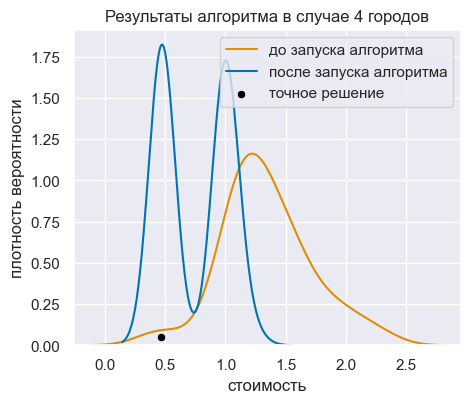

In [29]:
plt.figure(dpi = 100, figsize = (5, 4.1))
ax =\
sns.kdeplot(brute4['all']['cost'] , label = 'до запуска алгоритма', color = sns.color_palette("colorblind")[1])
sns.kdeplot(a4_tol['cost'] , label = 'после запуска алгоритма')
sns.scatterplot(x = brute4['min_cost'], y = [0.05], color = "black", label = "точное решение", s = 36)
plt.legend()
ax.set_xlabel("стоимость")
ax.set_ylabel("плотность вероятности")
ax.set_title("Результаты алгоритма в случае 4 городов")
#plt.savefig("./4towns.pdf")

### 4 других города

In [30]:
brute4_2 = brute(cost_matrix_4_2)
brute4_2['opt_perm_number'], brute4_2['min_cost']

(8, 0.8508603)

In [31]:
a4a_tol = extensively_test_circuit(cost_matrix_4_2, RxCNOTCircuit(4, 1), abs = True, tol = 1e-2, iterations = 1000)
calculate_statistics(a4a_tol, 4, brute4_2)
a4a_tol.mean()

cost                0.893171
nfev               50.175000
ncycles             3.345000
njev                0.000000
nhev                0.000000
cost / mean         0.582324
percentile_rank     0.063500
nfev * pr           3.034375
dtype: float64

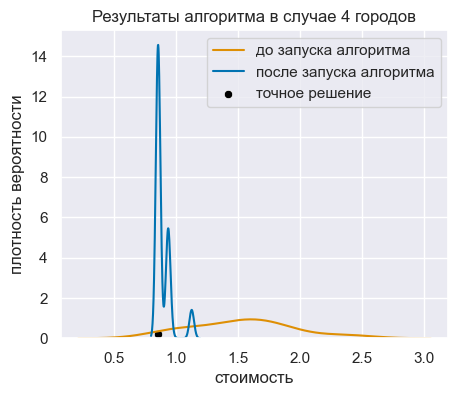

In [99]:
plt.figure(figsize = (5, 4))
ax =\
sns.kdeplot(brute4_2['all']['cost'] , label = 'до запуска алгоритма', color = sns.color_palette("colorblind")[1])
sns.kdeplot(a4a_tol['cost'] , label = 'после запуска алгоритма')
#sns.kdeplot(a4['cost'] , label = 'после запуска алгоритма')
sns.scatterplot(x = [brute4_2['min_cost']], y = [0.2], color = "black", label = "точное решение", s = 36)
plt.legend()
ax.set_xlabel("стоимость")
ax.set_ylabel("плотность вероятности")
ax.set_title("Результаты алгоритма в случае 4 городов")
plt.savefig("./4towns.pdf", bbox_inches = 'tight')

### 5 городов

In [33]:
brute5 = brute(cost_matrix_5)
brute5['opt_perm_number'], brute5['min_cost']

(67, 0.6275254699999999)

In [34]:
a5_tol = extensively_test_circuit(cost_matrix_5, RxCNOTCircuit(5, 1), abs = True, tol = 1e-2)
calculate_statistics(a5_tol, 5, brute5)
a5_tol.mean()

cost                0.993374
nfev               82.950000
ncycles             3.950000
njev                0.000000
nhev                0.000000
cost / mean         0.477168
percentile_rank     0.051000
nfev * pr           3.914750
dtype: float64

<AxesSubplot:xlabel='cost / mean', ylabel='Density'>

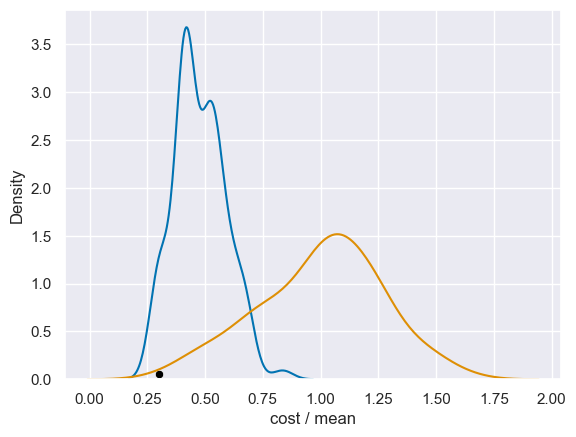

In [35]:
sns.kdeplot(a5_tol['cost / mean'])
sns.kdeplot(brute5['all']['cost'] / brute5['mean'])
sns.scatterplot(x = [brute5['min_cost'] / brute5['mean']], y = [0.05], color = 'black')

### 6 городов

In [36]:
brute6 = brute(cost_matrix_6)
brute6['opt_perm_number'], brute6['min_cost']

(649, 0.54586668)

In [37]:
a6_tol = extensively_test_circuit(cost_matrix_6, RxCNOTCircuit(6, 1), abs = True, tol = 1e-2)
calculate_statistics(a6_tol, 6, brute6)
a6_tol.mean()

cost                 0.983601
nfev               165.000000
ncycles              5.500000
njev                 0.000000
nhev                 0.000000
cost / mean          0.424473
percentile_rank      0.025375
nfev * pr            3.947500
dtype: float64

<AxesSubplot:xlabel='cost / mean', ylabel='Density'>

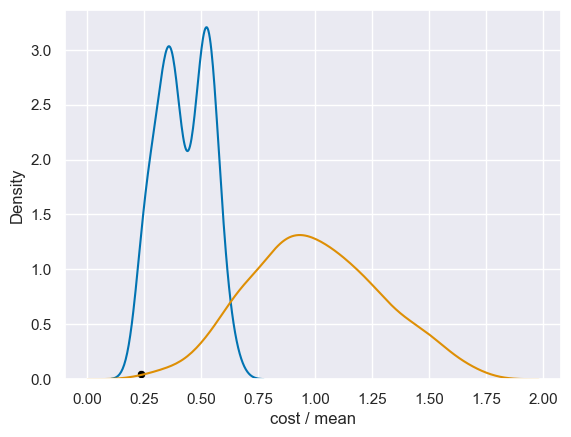

In [38]:
sns.kdeplot(a6_tol['cost / mean'])
sns.kdeplot(brute6['all']['cost / mean'])
sns.scatterplot(x = [brute6['min_cost'] / brute6['mean']], y = [0.05], color = 'black')

### 7 городов

In [39]:
brute7 = brute(cost_matrix_7)
brute7['opt_perm_number'] / factorials[7],
brute7['min_cost']

0.984199468298

In [40]:
a7_tol = extensively_test_circuit(cost_matrix_7, RxCNOTCircuit(7, 1), tol = 1e-2, abs = True)
calculate_statistics(a7_tol, 7, brute7)
a7_tol.mean()

cost                 1.535615
nfev               287.430000
ncycles              7.370000
njev                 0.000000
nhev                 0.000000
cost / mean          0.475660
percentile_rank      0.011530
nfev * pr            2.923762
dtype: float64

<AxesSubplot:xlabel='cost / mean', ylabel='Density'>

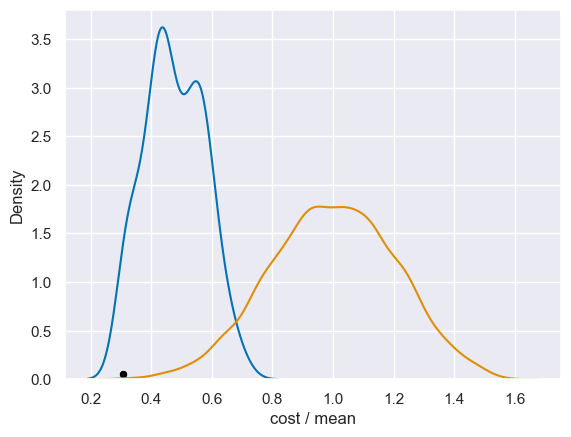

In [41]:
sns.kdeplot(a7_tol['cost / mean'])
sns.kdeplot(brute7['all']['cost / mean'])
sns.scatterplot(x = [brute7['min_cost'] / brute7['mean']], y = [0.05], color = 'black')

### 8 Городов

In [42]:
brute8 = brute(cost_matrix_8)
brute8['opt_perm_number'] / factorials[8], brute8['min_cost']

(0.8823660714285714, 1.46435226)

In [43]:
a8_tol = extensively_test_circuit(cost_matrix_8, RxCNOTCircuit(8, 1), tol = 1e-2)
calculate_statistics(a8_tol, 8, brute8)
a8_tol.mean()

cost                 1.980597
nfev               224.640000
ncycles              4.680000
njev                 0.000000
nhev                 0.000000
cost / mean          0.548472
percentile_rank      0.017808
nfev * pr            2.469893
dtype: float64

<AxesSubplot:xlabel='cost / mean', ylabel='Density'>

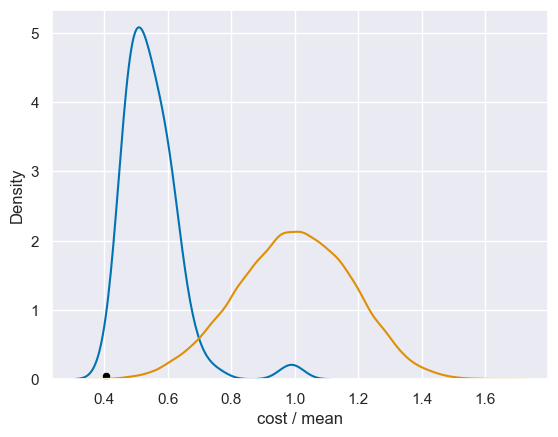

In [44]:
sns.kdeplot(a8_tol['cost / mean'])
sns.kdeplot(brute8['all']['cost / mean'])
sns.scatterplot(x = [brute8['min_cost'] / brute8['mean']], y = [0.05], color = 'black')

### 8 городов, другая матрица

In [45]:
brute8_2 = brute(cost_matrix_8_2)
brute8_2['opt_perm_number'] / factorials[8], brute8_2['min_cost']

(0.9030753968253968, 0.8431912)

In [46]:
a8a_tol = extensively_test_circuit(cost_matrix_8_2, RxCNOTCircuit(8, 1), abs = True, tol = 1e-2)
calculate_statistics(a8a_tol, 8, brute8_2)
a8a_tol.mean()

cost                 1.612193
nfev               348.480000
ncycles              7.260000
njev                 0.000000
nhev                 0.000000
cost / mean          0.468535
percentile_rank      0.009347
nfev * pr            3.468048
dtype: float64

In [85]:
# 2 слоя, стало хуже
# 38 min
a8a_tol_2 = extensively_test_circuit(cost_matrix_8_2, RxCNOTCircuit(8, 2), abs = True, tol = 1e-2)
calculate_statistics(a8a_tol_2, 8, brute8_2)
a8a_tol_2.mean()

cost                  2.644171
nfev               1644.480000
ncycles              17.130000
njev                  0.000000
nhev                  0.000000
cost / mean           0.768447
percentile_rank       0.289857
nfev * pr           373.260595
dtype: float64

In [89]:
# 2 слоя, стало хуже
# 345 min
a8a_2 = extensively_test_circuit(cost_matrix_8_2, RxCNOTCircuit(8, 2), abs = True, tol = 1e-3)
calculate_statistics(a8a_2, 8, brute8_2)
a8a_2.mean()

cost                  1.683697
nfev               8233.920000
ncycles              85.770000
njev                  0.000000
nhev                  0.000000
cost / mean           0.489315
percentile_rank       0.068038
nfev * pr           224.712548
dtype: float64

<AxesSubplot:xlabel='cost / mean', ylabel='Density'>

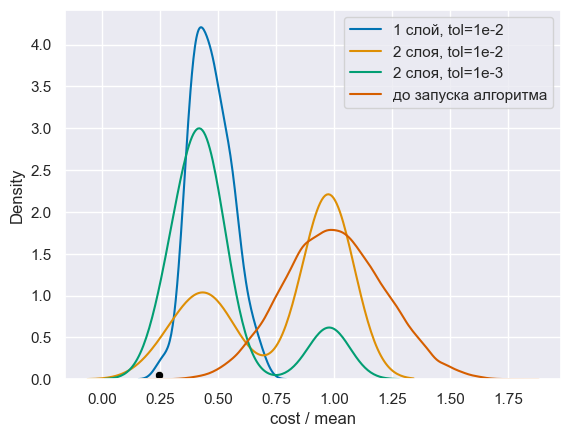

In [91]:
sns.kdeplot(a8a_tol['cost / mean'], label = '1 слой, tol=1e-2')
sns.kdeplot(a8a_tol_2['cost / mean'], label = '2 слоя, tol=1e-2')
sns.kdeplot(a8a_2['cost / mean'], label = '2 слоя, tol=1e-3')
sns.kdeplot(brute8_2['all']['cost / mean'], label = 'до запуска алгоритма')
sns.scatterplot(x = [brute8_2['min_cost'] / brute8_2['mean']], y = [0.05], color = 'black', )

### 9 городов

In [48]:
brute9 = brute(cost_matrix_9)

In [49]:
# 9 min
f9 = extensively_test_circuit(cost_matrix_9, RxCNOTCircuit(9, 1))
calculate_statistics(f9, 9, brute9);

In [50]:
# 15 min 
a9_tol = extensively_test_circuit(cost_matrix_9, RxCNOTCircuit(9, 1), abs = True, tol = 1e-2)
calculate_statistics(a9_tol, 9, brute9);

In [51]:
pd.DataFrame([f9.mean(), a9_tol.mean()], index = ['f9', 'a9_tol'])

,cost,nfev,ncycles,njev,nhev,cost / mean,percentile_rank,nfev * pr
f9,2.394614,288.42,5.06,0.0,0.0,0.558189,0.055875,6.003733
a9_tol,2.212778,543.78,9.54,0.0,0.0,0.515802,0.007842,2.414832


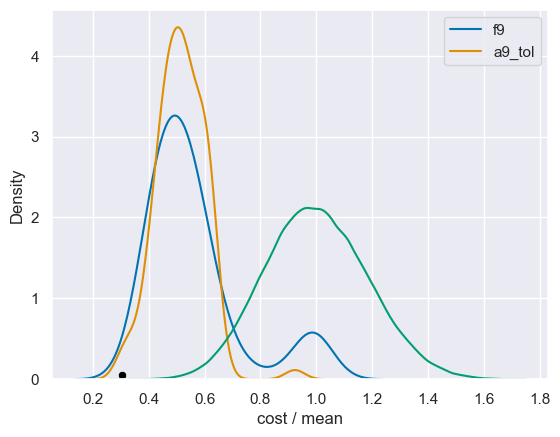

In [52]:
plt.figure(dpi = 100)
sns.kdeplot(f9['cost / mean'], label = 'f9')
sns.kdeplot(a9_tol['cost / mean'], label = 'a9_tol')
sns.kdeplot(brute9['all']['cost / mean']),
sns.scatterplot(x = [brute9['min_cost'] / brute9['mean']], y = [0.05], color = 'black')
plt.legend()

### 10 городов

In [53]:
brute10 = brute(cost_matrix_10)
brute10['opt_perm_number'] / factorials[10]

0.3440128968253968

In [54]:
# 2 h
a10_tol = extensively_test_circuit(cost_matrix_10, RxCNOTCircuit(10, 1), abs = True, tol = 1e-2)

In [55]:
a10_tol.iloc[:50]

,cost,nfev,ncycles,njev,nhev
0,2.108051,924,14,0,0
1,2.270216,990,15,0,0
2,1.458663,1518,23,0,0
3,1.026374,330,5,0,0
4,1.334324,2112,32,0,0
5,2.192580,396,6,0,0
6,2.094304,924,14,0,0
7,2.524783,1386,21,0,0
8,2.306238,660,10,0,0
9,1.074834,792,12,0,0


In [56]:
a10_tol.iloc[50:]

,cost,nfev,ncycles,njev,nhev
50,1.086570,462,7,0,0
51,1.748605,2046,31,0,0
52,1.976608,1782,27,0,0
53,2.231140,792,12,0,0
54,2.517891,198,3,0,0
55,1.980376,528,8,0,0
56,1.979299,330,5,0,0
57,1.797581,528,8,0,0
58,1.888507,528,8,0,0
59,2.167537,660,10,0,0


In [57]:
calculate_statistics(a10_tol, 10, brute10);

<AxesSubplot:xlabel='cost / mean', ylabel='Density'>

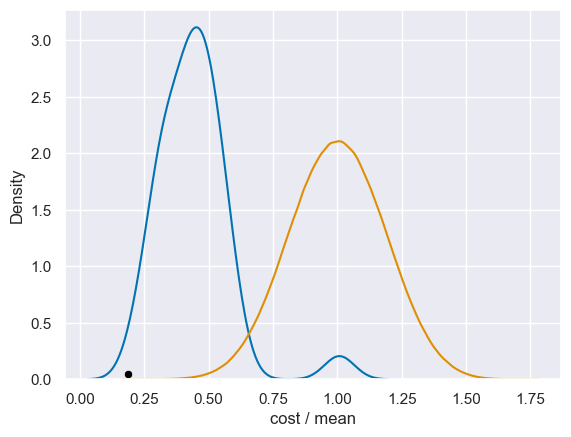

In [58]:
sns.kdeplot(a10_tol['cost / mean'])
sns.kdeplot(brute10['all']['cost / mean'])
sns.scatterplot(x = [brute10['min_cost'] / brute10['mean']], y = [0.05], color = 'black')

### Сводная диаграмма

In [65]:
brutes = pd.concat(
    [brute4_2['all'], brute5['all'], brute6['all'], brute7['all'], brute8_2['all'], brute9['all'], brute10['all']],
    keys = [4, 5, 6, 7, 8, 9, 10],
    names = ['n_towns']
)

In [60]:
simulations = pd.concat(
    [a4a_tol, a5_tol, a6_tol, a7_tol, a8a_tol, a9_tol, a10_tol], 
    keys = [4, 5, 6, 7, 8, 9, 10], 
    names = ['n_towns']
)

In [61]:
true_sols = pd.DataFrame({
    'min / mean': [
        brute4_2['min_cost'] / brute4_2['mean'],
        brute5['min_cost'] / brute5['mean'],
        brute6['min_cost'] / brute6['mean'],
        brute7['min_cost'] / brute7['mean'],
        brute8_2['min_cost'] / brute8_2['mean'],
        brute9['min_cost'] / brute9['mean'],
        brute10['min_cost'] / brute10['mean'],
    ],
    'n_towns': [4, 5, 6, 7, 8, 9, 10]
})

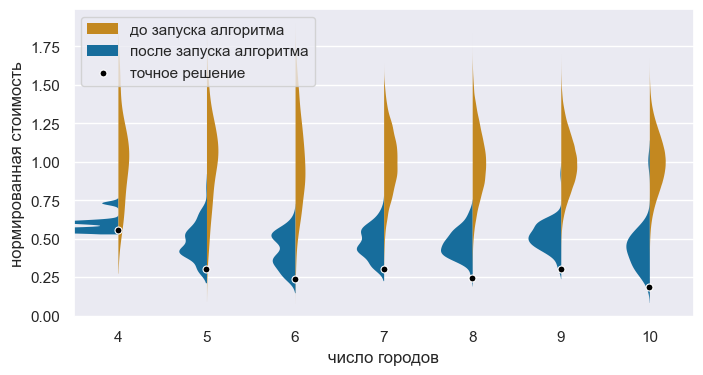

In [96]:
plt.figure(figsize = (8, 4))
sns.violinplot(data = pd.concat([simulations, brutes], keys = ['до', 'после'], names = ['aaa']).reset_index(), 
               x = 'n_towns', y = 'cost / mean', 
               hue = "aaa", 
               split = True, 
               linewidth = 0,
               #bw = 0.25,
               scale_hue = False,
               #scale = "width",
               width = 3.8
        )
ax = sns.stripplot(data = true_sols, x = 'n_towns', y = 'min / mean', color = 'black', jitter = False, label = 'точное решение', linewidth = 0.8, edgecolor = 'white')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles = [handles[1], handles[0], handles[2]], labels = ["до запуска алгоритма", "после запуска алгоритма", "точное решение"])
ax.set_xlabel("число городов")
ax.set_ylabel("нормированная стоимость")
#plt.xlim(-0.6, 3.5)
plt.savefig("./violin.pdf", dpi = 300, bbox_inches = "tight")

### Сложность

In [63]:
sns.set_palette('colorblind')

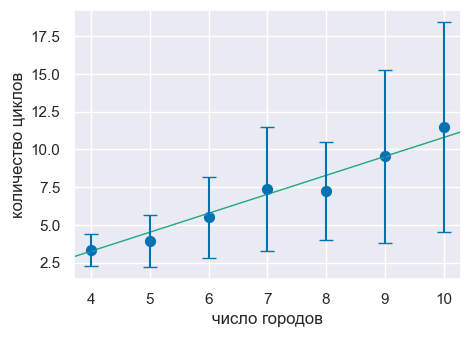

In [106]:
plt.figure(figsize = (5, 3.5))
ax = sns.regplot(
    data = simulations['ncycles'].reset_index(), 
    x = 'n_towns', y = 'ncycles', 
    x_estimator = np.mean, x_ci = None, ci = False, truncate = False, 
    line_kws = {
        'color': sns.color_palette('colorblind')[2], 
        'lw': 1,
        'zorder': 0.6
    }
)
ax.errorbar(
    x = range(4, 11), 
    y = simulations['ncycles'].groupby('n_towns').mean(), 
    yerr = simulations['ncycles'].groupby('n_towns').std(), 
    fmt = 'none', capsize = 5
)
ax.set_xlabel('число городов')
ax.set_ylabel('количество циклов')
plt.savefig('./ncycles.pdf', bbox_inches = 'tight')

### Сравнение с простым перебором

In [73]:
sns.set_palette('muted')

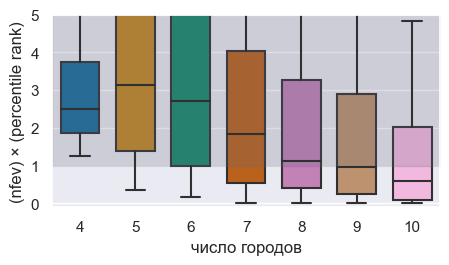

In [105]:
plt.figure(figsize = (5, 2.5))
sns.boxplot(data = simulations['nfev * pr'].reset_index(), 
            x = 'n_towns', y = 'nfev * pr',
            width = 0.7,
        )
ax = plt.gca()
ax.set_xlabel("число городов")
ax.set_ylabel("(nfev) × (percentile rank)")
ax.set_ylim(-0.1, 5)
plt.fill_between([-0.5, 6.5], [1, 1], [8, 8], color = (0.4, 0.4, 0.5, 0.22))
plt.savefig("./percentile.pdf", dpi = 300, bbox_inches = "tight")

In [75]:
sns.set_palette('colorblind')

<AxesSubplot:xlabel='n_towns', ylabel='nfev * pr'>

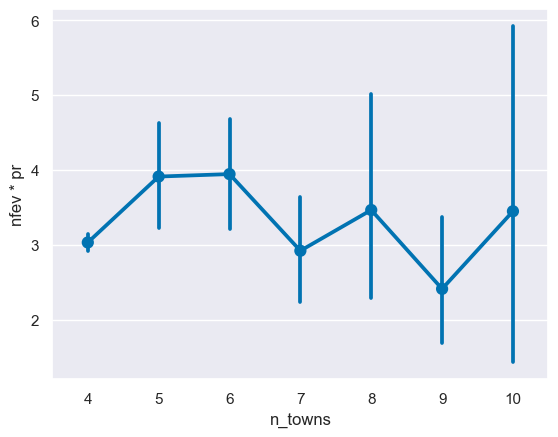

In [95]:
sns.pointplot(data = simulations.reset_index(), x = 'n_towns', y = 'nfev * pr', estimator = np.mean)

<AxesSubplot:xlabel='n_towns', ylabel='nfev * pr'>

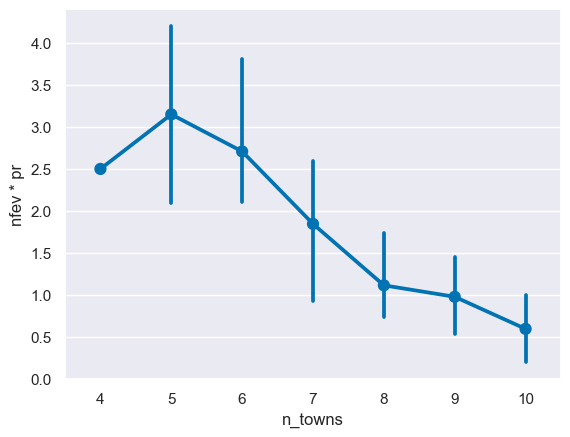

In [84]:
sns.pointplot(data = simulations.reset_index(), x = 'n_towns', y = 'nfev * pr', estimator = np.median)